# 구글 드라이브 마운트 (연동)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 작업 폴더로 이동

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝

/content/drive/MyDrive/Colab Notebooks/딥러닝


In [6]:
!ls

data  ex01_딥러닝기초.ipynb


# Keras로 신경망 설계
- Sequential() : 신경망을 초기화
- Dense() : 신경망 층을 정의
- add() : 정의된 신경망 층을 초기화한 신경망에 추가
- Activation() : 활성화함수층 정의
- compile() : 설계된 신경망을 학습할 수 있는 형태로 변환
- fit() : 학습
- predict() : 추론
- evaluate() : 평가

# AND논리 학습모델을 설계하고 추론

<pre>
A   B   AND
0   0   0
0   1   0
1   0   0
1   1   1
</pre>

- 입력 데이터 정의

In [7]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]

In [8]:
import numpy as np

np.array(X).shape, np.array(y).shape
# X의 0번 인덱스 : 데이터의 수
# X의 1번 인덱스 : 특성의 수 -> input_dim

((4, 2), (4,))

- 퍼셉트론 1개로 신경망 설계

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 신경망 초기화
model1 = Sequential()

# add() : 신경망에 정의된 층을 추가
# Dense() : 신경망 층을 정의
#    - units : 출력의 수 (퍼셉트론의 수)
#    - input_dim : 입력의 수 (특성의 수) -> 현재 특성 수 2개!
model1.add(Dense(units=1, input_dim=2))
model1.add(Activation("sigmoid"))
# sigmoid -> 로지스틱 회귀 모델

# summary() : 설계된 신경망의 구조를 출력
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 퍼셉트론 2개로 신경망 설계

In [10]:
model2 = Sequential()

# 1번 층
model2.add(Dense(units=1, input_dim=2))
model2.add(Activation("sigmoid"))

# 2번 층
# 입력 데이터의 크기(input_dim)는 첫번째 층에만 정의해주면 된다!
model2.add(Dense(units=1))
model2.add(Activation("sigmoid"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 퍼셉트론 5개로 구성된 신경망 설계

In [11]:
model5 = Sequential()

# 1번 층 (1)
model5.add(Dense(units= 4, input_dim=2))
model5.add(Activation("sigmoid"))

# 2번 층 (2)
model5.add(Dense(units= 1))
model5.add(Activation("sigmoid"))

model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 activation_3 (Activation)   (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 컴파일
  - loss : 손실 함수
    - 회귀 분석 : mse 또는 mean_squared_error
    - 이진 분류 : binary_crossentropy
    - 다진 분류 : categorical_crossentropy
  - optimizer : 최적화 함수 (adam)
  - metrics : 평가 함수 (오차, 정확도)

In [12]:
# 이진 분류
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

- 학습
  - epochs : 학습 반복수
  - batch_size : 학습에 사용할 데이터의 수

In [13]:
h1 = model1.fit(X, y, epochs=1000, batch_size=4)

Epoch 1/1000
1/1 [==============================] - 1s 615ms/step - loss: 0.8014 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8011 - accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.8007 - accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8004 - accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.8001 - accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7997 - accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7994 - accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7991 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7987 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7984 - accuracy: 0.7500
Epoch 11

- 추론

In [14]:
pred = model1.predict([[0,0]])
pred

1/1 [==============================] - 0s 114ms/step


array([[0.27948147]], dtype=float32)

In [16]:
pred = model1.predict([[0,1]])
pred

1/1 [==============================] - 0s 42ms/step


array([[0.3363657]], dtype=float32)

In [17]:
pred = model1.predict([[1,0]])
pred

1/1 [==============================] - 0s 55ms/step


array([[0.28148907]], dtype=float32)

In [15]:
pred = model1.predict([[1,1]])
pred

1/1 [==============================] - 0s 37ms/step


array([[0.3385899]], dtype=float32)

# XOR 논리 학습하기
<pre>
A  B  XOR
0  0  0
0  1  1
1  0  1
1  1  0![land.jpg](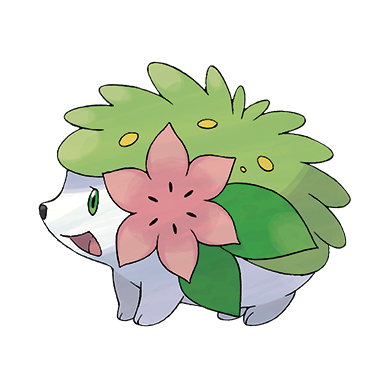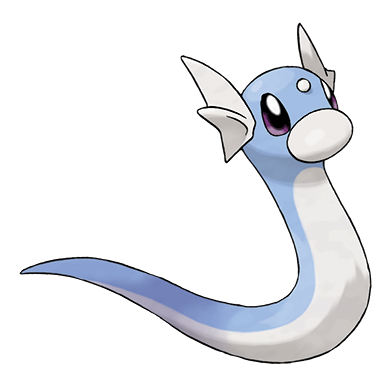)
</pre>

In [18]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 신경망 초기화
model6 = Sequential()

# add() : 신경망에 정의된 층을 추가
# Dense() : 신경망 층을 정의
model6.add(Dense(units=1, input_dim=2))
model6.add(Activation("sigmoid"))

model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
h6 = model6.fit(X, y, epochs=1000, batch_size=4)

Epoch 1/1000
1/1 [==============================] - 0s 413ms/step - loss: 0.7064 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7063 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7062 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7062 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7061 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7060 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7060 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7059 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7059 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.7058 - accuracy: 0.5000
Epoch 11

In [22]:
pred = model6.predict([[0,0]])
pred

1/1 [==============================] - 0s 65ms/step


array([[0.4985905]], dtype=float32)

In [23]:
pred = model6.predict([[0,1]])
pred

1/1 [==============================] - 0s 36ms/step


array([[0.50204134]], dtype=float32)

In [24]:
pred = model6.predict([[1,0]])
pred

1/1 [==============================] - 0s 35ms/step


array([[0.49791652]], dtype=float32)

In [25]:
pred = model6.predict([[1,1]])
pred

1/1 [==============================] - 0s 54ms/step


array([[0.50136733]], dtype=float32)

In [26]:
model1.fit(X,y, epochs=1000, batch_size=4)


Epoch 1/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7746 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.7745 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7744 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7743 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7740 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7738 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.7735 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7731 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7727 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7723 - accuracy: 0.5000
Epoch 11/

In [30]:
model5.fit(X,y,epochs=1000, batch_size=4)

Epoch 1/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6654 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6653 - accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6653 - accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6652 - accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6651 - accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6650 - accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6649 - accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6648 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6647 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6646 - accuracy: 0.7500
Epoch 11/

# 딥러닝 동작 방식 구현해보기

- (1) 파라미터 초기화 (w, b) - 랜덤 (y = wX + b)
- (2) 특성 데이터(X)를 입력 -> 예측값 y'를 계산 (y' = wX + b)
- (3) 오차 계산 : e = y - y'
  - 오차가 크다는 의미는 w, b가 잘못 설정이 된 것 - 오차가 발생한 만큼
  - 예를 들어, w가 10이고 b가 1이면 w가 더 영향을 준 것
  - w의 값은 줄이고 b값은 크게 재조정 -> 오차의 비율만큼!
- (4) 오차에 대한 가중치를 미분(나누기 - 비율)
- (5) 가중치 갱신 (미분값을 더해줌)
  - 학습률 : 미분값이 커서 가중치가 너무 크게 변하는 것을 방지하기 위해 미분값에 곱해줌 (0.001)

- 특성 데이터를 넣고 위의 과정을 반복 (오차가 목표값보다 작아질 때까지)




In [34]:
import numpy as np

# X : 특성데이터, y : 라벨데이터, epoch : 반복수, lr : 학습률
def fit_user(X, y, epoch, lr) :
  # (1) w, b 초기화 - randn : 정규분포 사용
  w = np.random.randn(1)
  b = np.random.randn(1)

  # (2) - (5)까지 epoch만큼 반복
  for i in range(epoch) :
    # (2) 특성 데이터를 입력하여 예측값을 계산
    pred_y = w * X + b

    # (3) 오차 계산 : 실제값 - 예측값
    e = y - pred_y

    # (4) 기울기(경사) - 미분 -> 경사하강법
    dw = e / w
    db = e / b


    # (5) 원래 가중치에 학습률을 곱한 기울기값을 더해서 가중치를 갱신
    w = w + lr * dw
    b = b + lr * db

    # 중간 결과값 출력
    print(f"반복수 : {i}, 예측값 : {pred_y}, 오차 : {e}")
    # 현재 파라미터 (w, b)값 출력
    print(f"w : {w}, b : {b}")

In [40]:
fit_user(1, 3, 100, 0.01)
# 예측값은 3에 가깝게, 오차는 0에 가깝게 나오면 성공!

반복수 : 0, 예측값 : [2.87478185], 오차 : [0.12521815]
w : [1.82781569], b : [1.04884671]
반복수 : 1, 예측값 : [2.8766624], 오차 : [0.1233376]
w : [1.82849047], b : [1.05002264]
반복수 : 2, 예측값 : [2.87851312], 오차 : [0.12148688]
w : [1.82915488], b : [1.05117964]
반복수 : 3, 예측값 : [2.88033452], 오차 : [0.11966548]
w : [1.82980909], b : [1.05231803]
반복수 : 4, 예측값 : [2.88212712], 오차 : [0.11787288]
w : [1.83045328], b : [1.05343816]
반복수 : 5, 예측값 : [2.88389143], 오차 : [0.11610857]
w : [1.83108759], b : [1.05454034]
반복수 : 6, 예측값 : [2.88562793], 오차 : [0.11437207]
w : [1.8317122], b : [1.05562491]
반복수 : 7, 예측값 : [2.88733712], 오차 : [0.11266288]
w : [1.83232727], b : [1.05669217]
반복수 : 8, 예측값 : [2.88901945], 오차 : [0.11098055]
w : [1.83293295], b : [1.05774244]
반복수 : 9, 예측값 : [2.89067539], 오차 : [0.10932461]
w : [1.8335294], b : [1.058776]
반복수 : 10, 예측값 : [2.8923054], 오차 : [0.1076946]
w : [1.83411676], b : [1.05979316]
반복수 : 11, 예측값 : [2.89390993], 오차 : [0.10609007]
w : [1.83469519], b : [1.06079421]
반복수 : 12, 예측값 : [2.895

# 딥러닝 회귀 분석

- 보스턴 집값 데이터셋

In [42]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


- 랜덤값에 대한 seed 설정
  - w,b를 랜덤으로 초기화 -> 신경망을 실행할 때마다 항상 다른 w, b 초기값들이 적용
    - 모델을 개선 시, 개선 이유가 모델에 의한 것인지 w, b의 초기값에 의한 것인지 구분이 안 됨
    - 팀원에 모델을 공유할 때 seed를 설정하지 않으면 공유한 모델을 그대로 적용 불가


In [43]:
# seed 설정
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

In [45]:
X_train.shape, y_train.shape

((404, 13), (404,))

- 신경망 설계

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model7 = Sequential()

# input_dim : 특성 데이터의 특성(컬럼) 수
# units : 알아서 해도 되는 값들
model7.add(Dense(units=30, input_dim=13))
model7.add(Activation("relu"))

# 출력층 (마지막층)
# units
#  - 회귀모델 : 1
#  - 이진분류 : 1 또는 2 (원핫인코딩)
#  - 다진분류 : 원핫인코딩 후의 y의 크기
# Activation()
#  - 회귀모델 : linear 또는 생략
#  - 이진모델 : sigmoid 또는 softmax (원핫인코딩)
#  - 다진모델 : softmax

model7.add(Dense(units=1))

model7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 activation_6 (Activation)   (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451 (1.76 KB)
Trainable params: 451 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 컴파일

In [47]:
# 회귀분석일 때 loss : mse 또는 mean_squared_error
# 회귀분석일 때 metrics : 생략 -> loss로 인식
model7.compile(loss="mse", optimizer="adam")

In [48]:
# validation_data : 검증 데이터를 설정 (검증 데이터가 있는 경우)
# validation_split : 해당 비율만큼을 검증 데이터로 사용 (검증 데이터가 없는 경우)
h7 = model7.fit(X_train, y_train, epochs=200, batch_size=10,
                validation_data=(X_test, y_test))

Epoch 1/200
41/41 [==============================] - 1s 11ms/step - loss: 3575.5117 - val_loss: 1021.8356
Epoch 2/200
41/41 [==============================] - 0s 4ms/step - loss: 661.3638 - val_loss: 236.9125
Epoch 3/200
41/41 [==============================] - 0s 5ms/step - loss: 211.1331 - val_loss: 132.8211
Epoch 4/200
41/41 [==============================] - 0s 3ms/step - loss: 129.9218 - val_loss: 110.3730
Epoch 5/200
41/41 [==============================] - 0s 4ms/step - loss: 101.7776 - val_loss: 95.7164
Epoch 6/200
41/41 [==============================] - 0s 5ms/step - loss: 86.2974 - val_loss: 88.1458
Epoch 7/200
41/41 [==============================] - 0s 5ms/step - loss: 77.4583 - val_loss: 82.0417
Epoch 8/200
41/41 [==============================] - 0s 3ms/step - loss: 71.4757 - val_loss: 77.6042
Epoch 9/200
41/41 [==============================] - 0s 5ms/step - loss: 68.1109 - val_loss: 74.6975
Epoch 10/200
41/41 [==============================] - 0s 5ms/step - loss: 66.48

- 시각화 하기

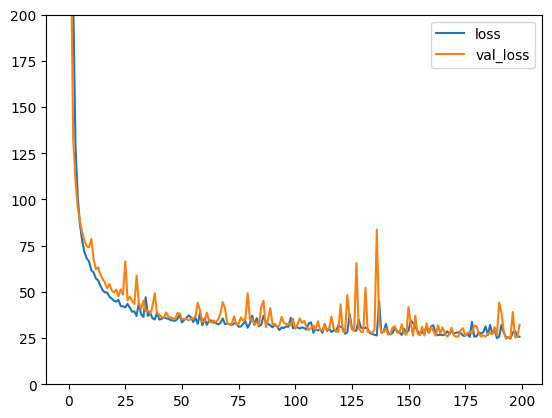

In [49]:
import matplotlib.pyplot as plt

plt.plot(h7.history["loss"], label="loss")
plt.plot(h7.history["val_loss"], label="val_loss")
plt.ylim(0,200)
plt.legend()
plt.show()

- 예측하기

In [50]:
pred = model7.predict(X_test)

for i in range(10) :
  print(f"실제값 : {y_test[i]}, 예측값 : {pred[i][0]:.1f}")  # pred[i]에서 리스트 벗겨내고, 소수점 첫째자리에서 반올림

4/4 [==============================] - 0s 3ms/step
실제값 : 7.2, 예측값 : 12.9
실제값 : 18.8, 예측값 : 24.4
실제값 : 19.0, 예측값 : 25.4
실제값 : 27.0, 예측값 : 35.3
실제값 : 22.2, 예측값 : 27.1
실제값 : 24.5, 예측값 : 24.8
실제값 : 31.2, 예측값 : 32.2
실제값 : 22.9, 예측값 : 26.3
실제값 : 20.5, 예측값 : 21.1
실제값 : 23.2, 예측값 : 24.0


- 모델 평가

In [51]:
model7.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 32.2127


32.21268081665039

- 이진분류 딥러닝 학습

  - 유방암 데이터셋
     - 569개 데이터
     - 악성, 양성 라벨

In [56]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [58]:
X = cancer.data
y = cancer.target

X.shape, y.shape

((569, 30), (569,))

In [59]:
import pandas as pd

pd.Series(y).unique()
# -> label이 0과 1인 이진분류 모델이다!

array([0, 1])

- 이진분류 신경망 모델 설계 (라벨을 원핫인코딩 하지 않는 경우)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model8 = Sequential()

# 입력층
model8.add(Dense(units=32, input_dim=30))
model8.add(Activation("sigmoid"))

# 은닉층
model8.add(Dense(units=16))
model8.add(Activation("sigmoid"))

# 출력층
# 이진분류모델에서 라벨을 원핫인코딩 하지 않으면
# units = 1
# Activation("sigmoid")
model8.add(Dense(units=1))
model8.add(Activation("sigmoid"))

model8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                992       
                                                                 
 activation_7 (Activation)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 activation_8 (Activation)   (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
 activation_9 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6

In [62]:
# 이진분류 : loss="binary_crossentropy"
model8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# validation_split=0.2 : 검증데이터를 훈련데이터에서 20% 가져다 쓴다
h8 = model8.fit(X, y, epochs=200, batch_size=16,
                validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 2s 15ms/step - loss: 0.7108 - accuracy: 0.4549 - val_loss: 0.6604 - val_accuracy: 0.8158
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 0.6340 - accuracy: 0.8022 - val_loss: 0.5819 - val_accuracy: 0.7982
Epoch 3/200
29/29 [==============================] - 0s 6ms/step - loss: 0.6026 - accuracy: 0.7275 - val_loss: 0.5542 - val_accuracy: 0.8246
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5838 - accuracy: 0.6967 - val_loss: 0.5254 - val_accuracy: 0.9035
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5639 - accuracy: 0.8308 - val_loss: 0.5353 - val_accuracy: 0.8509
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5448 - accuracy: 0.8879 - val_loss: 0.4808 - val_accuracy: 0.9123
Epoch 7/200
29/29 [==============================] - 0s 8ms/step - loss: 0.5210 - accuracy: 0.8857 - val_loss: 0.4796 - val_accuracy: 0.8947
Epoch 8/200
